In [71]:
## Import libraries
import numpy as np
from numpy.random import rand
from numpy import percentile
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy.stats as ss
import statsmodels.stats.weightstats as ws
from scipy.stats import chi2_contingency

In [72]:
# Read the data as a data frame
df = pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
#Performing EDA

In [4]:
# Shape of the data
print(df.shape)

(1338, 7)


In [5]:
# Data type of each attribute
print(df.dtypes)

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


In [6]:
# Checking the presence of missing values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
# Checking the presence of missing values
#df.isnull().any()
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
# 5 point summary of numerical attributes
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


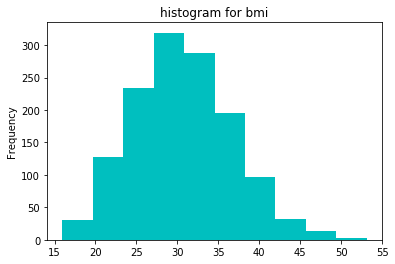

In [9]:
# Distribution of ‘bmi’, ‘age’ and ‘charges’ columns

df.bmi.plot(kind='hist', title='histogram for bmi', color='c', bins=10);


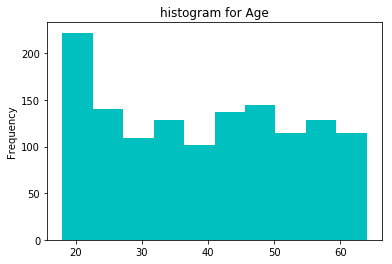

In [11]:
df.age.plot(kind='hist', title='histogram for Age', color='c', bins=10);

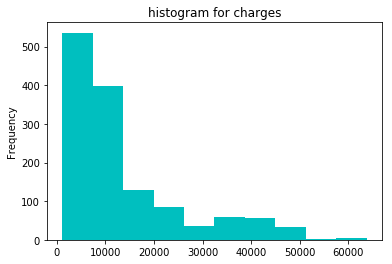

In [12]:
df.charges.plot(kind='hist', title='histogram for charges', color='c', bins=10);

In [13]:
 # Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns
    
print("skewness of bmi : %f" % df['bmi'].skew())
print("skewness of age : %f" % df['age'].skew())
print("skewness of charges : %f" % df['charges'].skew())

skewness of bmi : 0.284047
skewness of age : 0.055673
skewness of charges : 1.515880


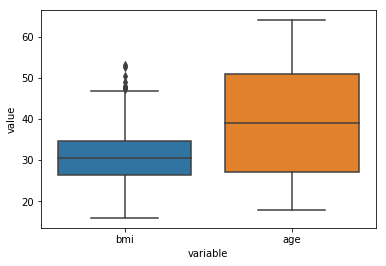

In [14]:
# Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges columns 

df_box= pd.DataFrame(data = df, columns = ['bmi','age'])

sns.boxplot(x="variable", y="value", data=pd.melt(df_box))

plt.show()


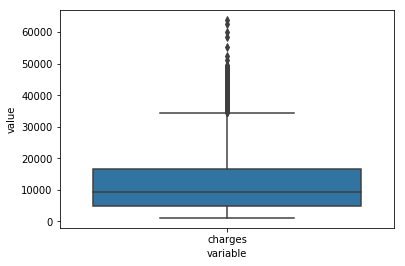

In [15]:
#sns.boxplot(y= df["charges"]);
df_box= pd.DataFrame(data = df, columns = ['charges'])

sns.boxplot(x="variable", y="value", data=pd.melt(df_box))

plt.show()

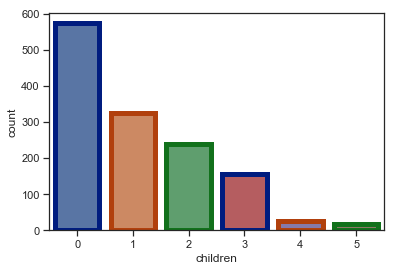

In [71]:
# Distribution of categorical columns (include children)
df1 = df.astype({"children":'category'})
sns.countplot(x="children", data=df,linewidth=5,edgecolor=sns.color_palette("dark", 3))
plt.show()

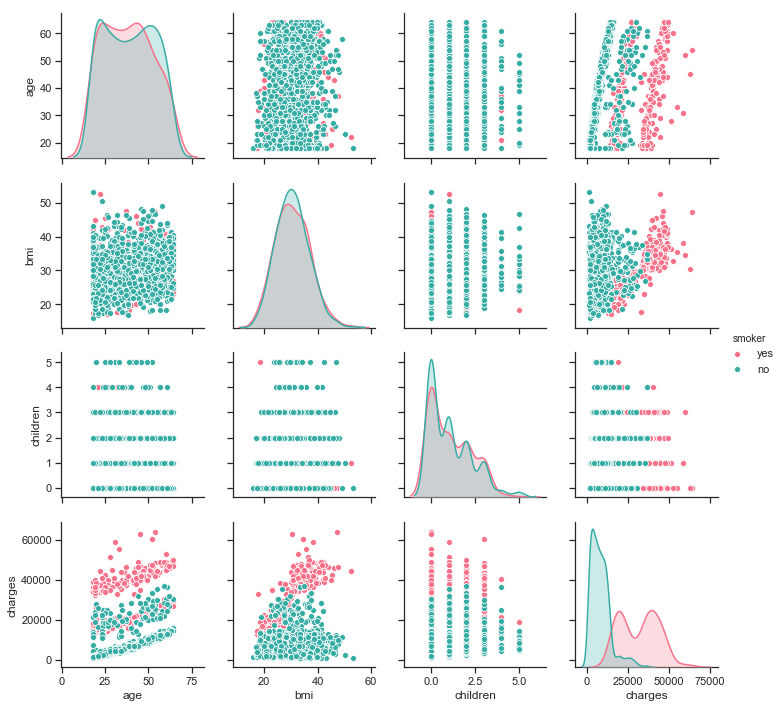

In [73]:
# Pair plot that includes all the columns of the data frame
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(df, hue="smoker", palette="husl")

In [17]:
# Q4-A We now compare charges by grouping them by the smoker category and look at the mean and std.
charges_grouped = df[['charges','smoker']].groupby('smoker')
print(' Mean by smoker')
print(charges_grouped.mean().round(2))
print('\n Standard deviation by smoker')
print(charges_grouped.std().round(2))

 Mean by smoker
         charges
smoker          
no       8434.27
yes     32050.23

 Standard deviation by smoker
         charges
smoker          
no       5993.78
yes     11541.55


how much the smoker and non-smoker differ in their medical charges, and also by their standard deviation; 
std of smokers is more than double of that of non-smoker. 
Hence while non-smokers seem to have their medical charges varying little about the mean

In [35]:
def t_test_two_samples(a, b, alpha, alternative='two-sided'):
    diff = a.mean() - b.mean()
    res = ss.ttest_ind(a, b)
    means = ws.CompareMeans(ws.DescrStatsW(a), ws.DescrStatsW(b))
    confint = means.tconfint_diff(alpha=alpha, alternative=alternative, usevar='unequal') 
    degfree = means.dof_satt()
    index = ['DegFreedom', 'Difference', 'Statistic', 'PValue', 'Low95CI', 'High95CI']
    print(index)
    return pd.Series([degfree, diff, res[0], res[1], confint[0], confint[1]], index = index)  
   
test = t_test_two_samples(df.loc[df.smoker == 'yes', 'charges'], df.loc[df.smoker == 'no', 'charges'], 0.05)
test

['DegFreedom', 'Difference', 'Statistic', 'PValue', 'Low95CI', 'High95CI']


DegFreedom     3.118511e+02
Difference     2.361596e+04
Statistic      4.666492e+01
PValue        8.271436e-283
Low95CI        2.219721e+04
High95CI       2.503471e+04
dtype: float64

p-value is basically 0, hence for alpha = 0.05 we reject the null hypothesis H0 and we accept H1;

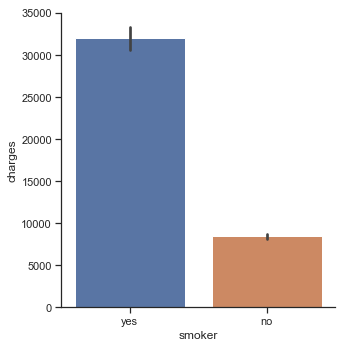

In [102]:
# charges of people who smoke differ significantly from the people who don't
sns.catplot(x="smoker", y="charges", data=df, kind="bar");

In [50]:
## Q $ -b-- bmi of males differ significantly from that of females?
mBMI = df['bmi'].loc[df['sex']=='male']
fBMI = df['bmi'].loc[df['sex']=='female']
t_statistic, p_value  =  ss.ttest_ind(mBMI,fBMI)
print(t_statistic,p_value) 


1.696752635752224 0.08997637178984932


p-value is not 0, hence for alpha = 0.05  we accept H1

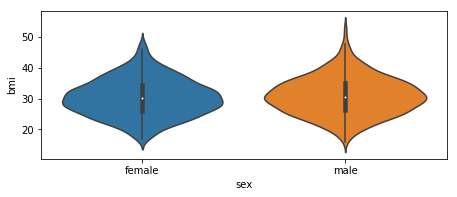

In [44]:
## Q $ -b-- bmi of males differ significantly from that of females?

plt.rcParams["figure.figsize"]=(16,6)
plt.subplot(2,2,1)

sns.violinplot(x="sex",y="bmi",data=df);

In [70]:
#4. C- proportion of smokers significantly different in different genders
# H0: The two categorical variables are independent
# Ha: The two categorical variables are dependent


# Creating contingency table
cont = pd.crosstab(df["sex"],
                   df["smoker"])

print(cont)
#print(chi2_contingency(cont))
chi2, p_val, dof, cont = chi2_contingency(cont)
print ("Chi2 Statistic : ",chi2 )
print ("P-value : ",p_val )
print ("Degree of freedom : ",dof )
print ("Contingency : ",cont )

#The p-value 0.006 < 0.05 hence we conclude that the 2 categorical variables are dependent

smoker   no  yes
sex             
female  547  115
male    517  159
Chi2 Statistic :  7.39291081459996
P-value :  0.006548143503580696
Degree of freedom :  1
Contingency :  [[526.43348281 135.56651719]
 [537.56651719 138.43348281]]


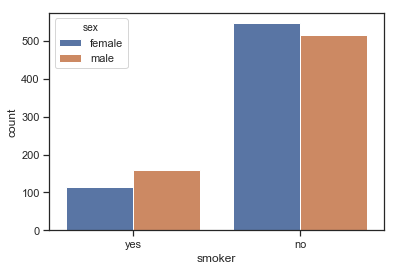

In [78]:
#4. C- proportion of smokers significantly different in different genders
sns.countplot(x="smoker",hue="sex", data=df);

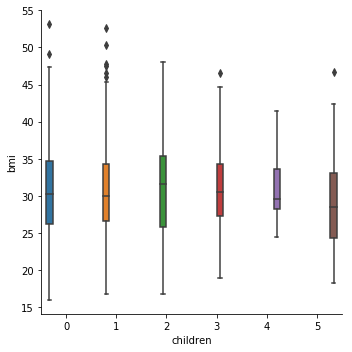

In [85]:
sns.catplot(x="children", y='bmi',hue='children', kind='box', data=df);